# NHL Player Performance Analysis

#### Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

#### Load Data

In [2]:
file = "data/game_skater_stats.csv"
raw_df = pd.read_csv(file)
raw_df.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
0,2011030221,8467412,1,999,0,0,1,3,0,0,...,0,0,0,0,0,0,-1,885,98,16
1,2011030221,8468501,1,1168,0,0,0,4,0,0,...,0,1,1,0,0,1,0,767,401,0
2,2011030221,8470609,1,558,0,0,2,1,0,0,...,2,0,0,0,0,1,-1,542,0,16
3,2011030221,8471816,1,1134,0,0,1,4,0,0,...,0,1,0,0,0,1,-1,935,183,16
4,2011030221,8472410,1,436,0,0,1,3,0,0,...,6,0,0,0,0,0,-1,436,0,0


#### Clean Data

In [3]:
raw_df.count()

game_id                 411578
player_id               411578
team_id                 411578
timeOnIce               411578
assists                 411578
goals                   411578
shots                   411578
hits                    411578
powerPlayGoals          411578
powerPlayAssists        411578
penaltyMinutes          411578
faceOffWins             411578
faceoffTaken            411578
takeaways               411578
giveaways               411578
shortHandedGoals        411578
shortHandedAssists      411578
blocked                 411578
plusMinus               411578
evenTimeOnIce           411578
shortHandedTimeOnIce    411578
powerPlayTimeOnIce      411578
dtype: int64

In [4]:
drop_na_df = raw_df.dropna(how='any')
drop_na_df.count()

game_id                 411578
player_id               411578
team_id                 411578
timeOnIce               411578
assists                 411578
goals                   411578
shots                   411578
hits                    411578
powerPlayGoals          411578
powerPlayAssists        411578
penaltyMinutes          411578
faceOffWins             411578
faceoffTaken            411578
takeaways               411578
giveaways               411578
shortHandedGoals        411578
shortHandedAssists      411578
blocked                 411578
plusMinus               411578
evenTimeOnIce           411578
shortHandedTimeOnIce    411578
powerPlayTimeOnIce      411578
dtype: int64

In [5]:
drop_na_df.columns

Index(['game_id', 'player_id', 'team_id', 'timeOnIce', 'assists', 'goals',
       'shots', 'hits', 'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes',
       'faceOffWins', 'faceoffTaken', 'takeaways', 'giveaways',
       'shortHandedGoals', 'shortHandedAssists', 'blocked', 'plusMinus',
       'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce'],
      dtype='object')

In [6]:
data_df = drop_na_df.rename(columns={
    'game_id':'Game ID',
    'player_id':'Player ID',
    'team_id': 'Team ID',
    'timeOnIce':'Time On Ice',
    'assists':'Assists',
    'goals':'Goals',
    'shots':'Shots',
    'hits':'Hits',
    'powerPlayGoals':'Power Play Goals',
    'powerPlayAssists':'Power Play Assists',
    'penaltyMinutes':'Penalty Minutes',
    'faceOffWins':'Faceoff Wins',
    'faceoffTaken':'Faceoff Taken',
    'takeaways':'Takeaways',
    'giveaways':'Giveaways',
    'shortHandedGoals':'Short Handed Goals',
    'shortHandedAssists':'Short Handed Assists',
    'blocked':'Blocked',
    'plusMinus':'Plus Minus',
    'evenTimeOnIce':'Even Time on Ice',
    'shortHandedTimeOnIce':'Short Handed Time on Ice',
    'powerPlayTimeOnIce':'Power Play Time on Ice'
})
data_df.head()

,Game ID,Player ID,Team ID,Time On Ice,Assists,Goals,Shots,Hits,Power Play Goals,Power Play Assists,...,Faceoff Taken,Takeaways,Giveaways,Short Handed Goals,Short Handed Assists,Blocked,Plus Minus,Even Time on Ice,Short Handed Time on Ice,Power Play Time on Ice
0,2011030221,8467412,1,999,0,0,1,3,0,0,...,0,0,0,0,0,0,-1,885,98,16
1,2011030221,8468501,1,1168,0,0,0,4,0,0,...,0,1,1,0,0,1,0,767,401,0
2,2011030221,8470609,1,558,0,0,2,1,0,0,...,2,0,0,0,0,1,-1,542,0,16
3,2011030221,8471816,1,1134,0,0,1,4,0,0,...,0,1,0,0,0,1,-1,935,183,16
4,2011030221,8472410,1,436,0,0,1,3,0,0,...,6,0,0,0,0,0,-1,436,0,0


#### One Hot Encoding/Dummie Data
##### Data is already numeric, but good practice to take note of this helpful/necessary step

In [7]:
data = pd.get_dummies(data_df)
data.head()

,Game ID,Player ID,Team ID,Time On Ice,Assists,Goals,Shots,Hits,Power Play Goals,Power Play Assists,...,Faceoff Taken,Takeaways,Giveaways,Short Handed Goals,Short Handed Assists,Blocked,Plus Minus,Even Time on Ice,Short Handed Time on Ice,Power Play Time on Ice
0,2011030221,8467412,1,999,0,0,1,3,0,0,...,0,0,0,0,0,0,-1,885,98,16
1,2011030221,8468501,1,1168,0,0,0,4,0,0,...,0,1,1,0,0,1,0,767,401,0
2,2011030221,8470609,1,558,0,0,2,1,0,0,...,2,0,0,0,0,1,-1,542,0,16
3,2011030221,8471816,1,1134,0,0,1,4,0,0,...,0,1,0,0,0,1,-1,935,183,16
4,2011030221,8472410,1,436,0,0,1,3,0,0,...,6,0,0,0,0,0,-1,436,0,0


### Linear Regression Model

#### View the various correlations each variable has against the others

In [8]:
cor = data.corr()

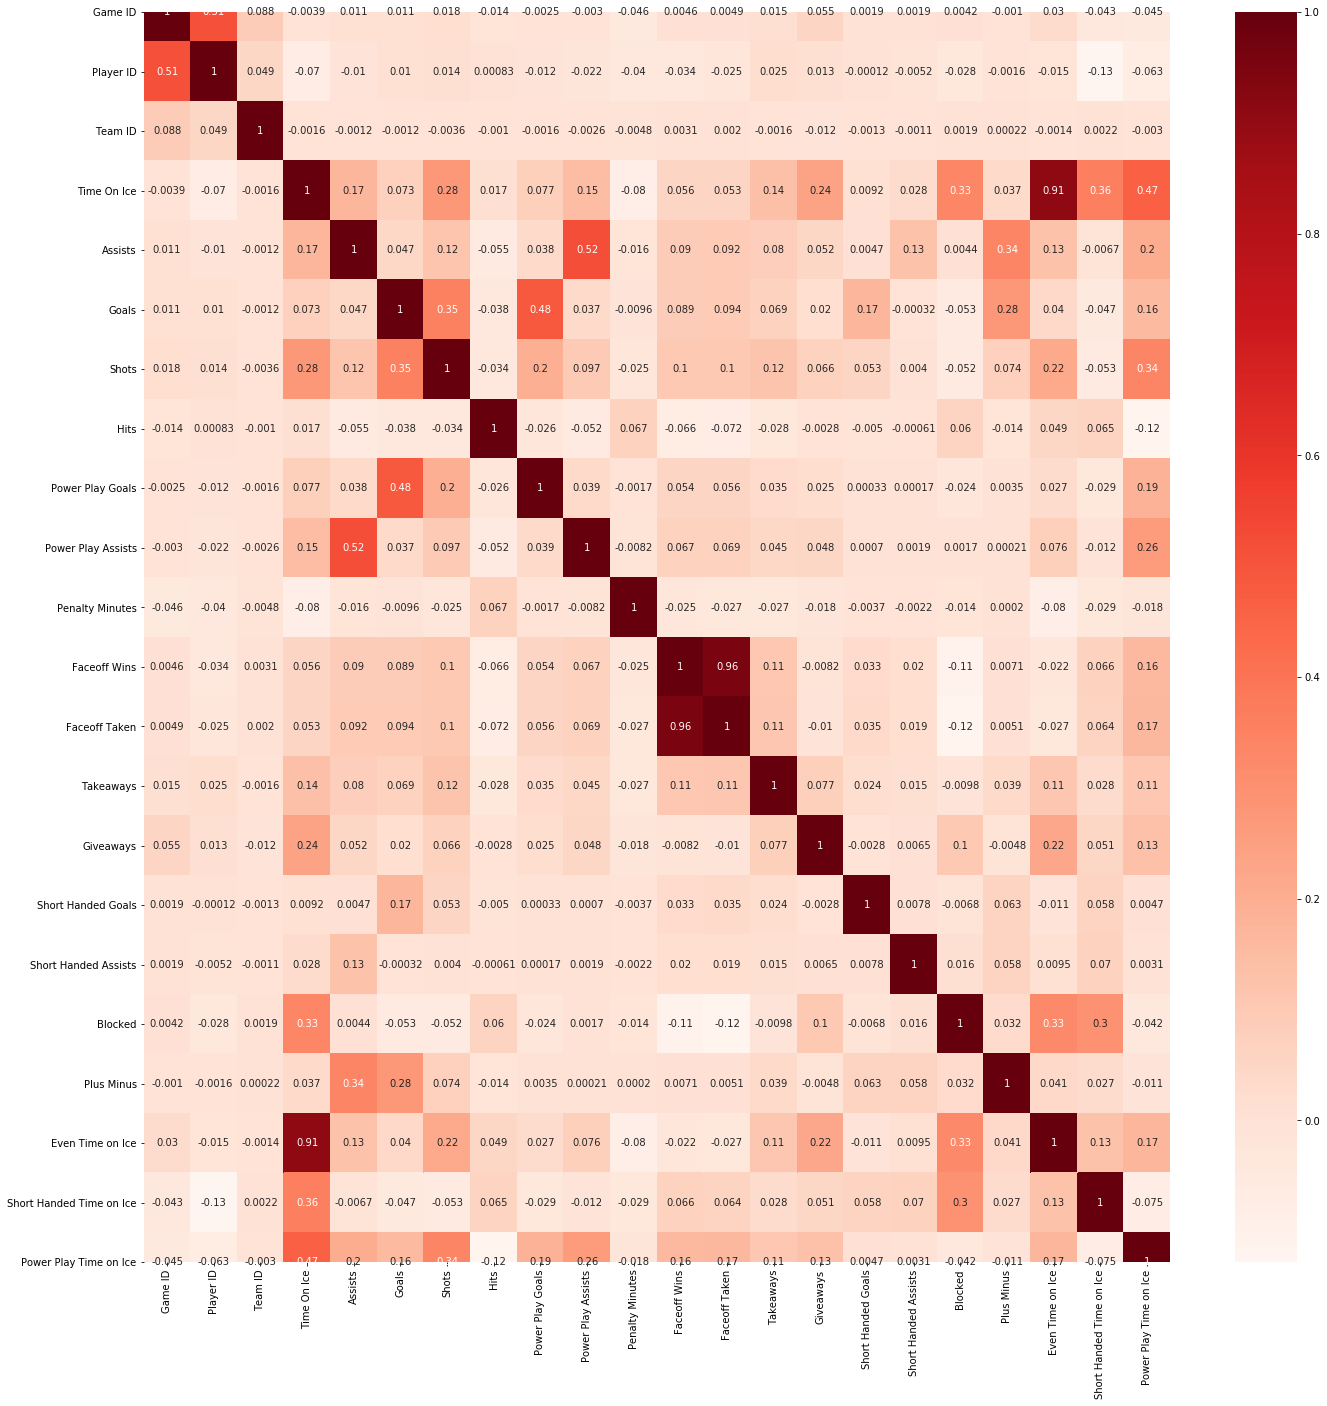

In [9]:
plt.figure(figsize=(23,23))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### The goal behind this analysis is to win games from a statistical standpoint. In order to win games, you must score more goal than the other team. Our dependent variable for this exercise, will be "Goals."

In [11]:
cor_target = abs(cor["Goals"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

Goals                     1.000000
Shots                     0.352746
Power Play Goals          0.484685
Short Handed Goals        0.171623
Plus Minus                0.280592
Power Play Time on Ice    0.156170
Name: Goals, dtype: float64

##### Based on the above correlations, the statistics most highly correlated to "Goals" (in desending order) are :
    - Power Play Goals
    - Shots
    - Plus Minus
    - Short Handed Goals
    - Time on Ice

#### In order to show the most relevant data, we need to see how closely the variables above correlate to one another - This will help us eliminate unnecessary variables

In [12]:
print(data_df[["Power Play Goals","Shots"]].corr())

                  Power Play Goals     Shots
Power Play Goals          1.000000  0.196382
Shots                     0.196382  1.000000


In [13]:
print(data_df[["Plus Minus","Power Play Goals"]].corr())

                  Plus Minus  Power Play Goals
Plus Minus          1.000000          0.003458
Power Play Goals    0.003458          1.000000


In [14]:
print(data_df[["Shots","Plus Minus"]].corr())

               Shots  Plus Minus
Shots       1.000000    0.074454
Plus Minus  0.074454    1.000000


Shape:  (411578, 1) (411578, 1)


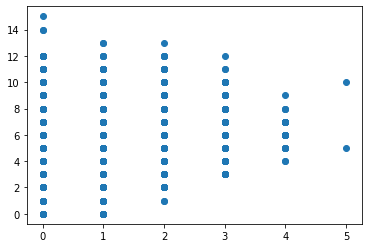

In [22]:
X = data_df["Goals"].values.reshape(-1, 1)
y = data_df["Shots"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
plt.scatter(X, y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.12434443600394696
Testing Score: 0.12468217166148166


In [26]:
predicted = model.predict(X_test)

mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 2.066932838701671
R-squared (R2 ): 0.12468217166148166


In [27]:
model.score(X_test, y_test)

0.12468217166148166

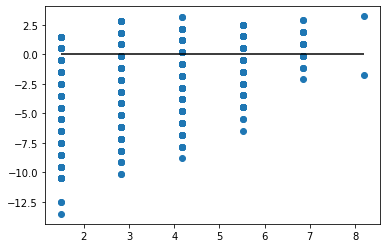

In [28]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()